# Image data set for alphabets in the American Sign Language

### import libraries

In [37]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
import glob
import tensorflow_datasets as tfds 
import tensorflow_io as tfio
import pandas as pd
import random
import cv2
import math

from Functions import get_image_data



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

### read, pixelize, greyscale, reshape images - create a dataframe and save it as a csv file 

In [ ]:
pixel_x = 60
pixel_y = 60
no_imgs = 3000
selection_size = 2200
seed_rand=42
path = '../asl_alphabet_train/'

df = pd.DataFrame()

directory = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'J':9, 'K':10, 'L':11, 'M':12, \
            'N':13, 'O':14, 'P':15, 'Q':16, 'R':17, 'S':18, 'T':19, 'U':20, 'V':21, 'W':22, 'X':23, 'Y':24, \
            'Z':25, 'del':26, 'nothing':27, 'space':28}


keys = directory.keys()
num_all = []


random.seed(seed_rand)
number = []
while len(number)<selection_size:
    x = random.randint(1,no_imgs)
    if x not in number:
        number.append(x)

for key in keys:
    print(key)

    df_list = [pd.DataFrame(tfds.as_numpy(tf.image.resize(tfio.experimental.color.rgb_to_grayscale(tf.image.decode_image(\
                     tf.io.read_file(path + key + '/' + key + str(x) + '.jpg'))), \
                     (pixel_x, pixel_y), method=tf.image.ResizeMethod.BILINEAR, \
                      preserve_aspect_ratio=False, antialias=False, name=None)).reshape(1, pixel_x*pixel_y)) for x in number]
    
    

    img_df = pd.concat(df_list)
    img_df['label'] = directory[key]
    df = pd.concat([df, img_df], ignore_index = True, axis = 0)
            
# df.to_csv('images_pixelized2200.csv', encoding='utf-8')  
# df = pd.read_csv('images_pixelized_2200.csv')
#df.drop(columns=['Unnamed: 0'], inplace=True)
#pixel_x = 60
#pixel_y = 60   

### report shape of dataframe

In [4]:
df.shape

(63800, 3601)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3591,3592,3593,3594,3595,3596,3597,3598,3599,label
0,17.638887,31.583330,27.805553,27.777775,25.833330,26.500000,28.333332,26.083332,24.166668,24.333332,...,155.00003,154.83336,153.00003,152.52780,151.25003,152.83336,155.44443,158.75000,150.80560,0
1,18.305555,24.749998,25.416666,23.944443,27.583332,27.972218,28.999996,28.833332,30.361107,31.027777,...,140.66669,140.41669,139.83336,137.83337,137.75003,137.63890,133.94443,132.66669,125.61116,0
2,17.638887,24.750000,25.722221,24.583332,26.916664,27.805553,28.722220,29.333332,30.638885,28.833332,...,138.66669,139.16669,138.00003,136.97226,136.33336,134.02782,132.69444,132.83334,123.30565,0
3,19.833332,37.833330,34.222220,35.055550,36.333330,35.472220,35.527770,36.999996,36.999992,35.333330,...,155.80559,153.58334,149.97224,150.52777,154.16669,156.83336,161.24997,169.00002,161.08339,0
4,19.722221,38.083330,34.861107,37.055550,35.416664,35.499996,34.555550,36.666664,35.972218,36.638885,...,154.52780,152.00003,149.52780,150.69446,153.00002,156.19446,160.72220,165.16669,162.08339,0


### original image

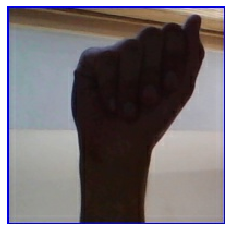

In [10]:
image = tf.image.decode_image(tf.io.read_file('../asl_alphabet_train/A/A200.jpg'))
plt.figure()
plt.imshow(image)
plt.axis('off')
plt.show()

### same image after greyscaling/reshaping 

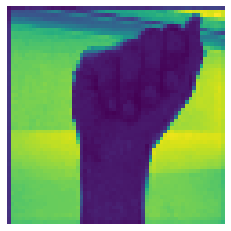

In [13]:
file_name = '../asl_alphabet_train/A/A200.jpg'
image_1 = tf.image.decode_image(tf.io.read_file(file_name))
grayscale_1 = tfio.experimental.color.rgb_to_grayscale(image_1)
downsized_1 = tf.image.resize(grayscale_1, (pixel_x, pixel_y), method=tf.image.ResizeMethod.BILINEAR, \
                            preserve_aspect_ratio=False, antialias=False, name=None)

plt.figure()
plt.imshow(tf.squeeze(downsized_1, axis=-1))
plt.axis('off')
plt.show()

### normalize pixels value

In [14]:
df_mod = df.drop(columns=['label'])
df_mod = df_mod.astype('float32')/255
print(df_mod.shape)
df_mod.head()

(63800, 3600)


,0,1,2,3,4,5,6,7,8,9,...,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599
0,0.069172,0.123856,0.109041,0.108932,0.101307,0.103922,0.111111,0.102288,0.094771,0.095425,...,0.614924,0.607843,0.607190,0.600000,0.598148,0.593137,0.599347,0.609586,0.622549,0.591395
1,0.071786,0.097059,0.099673,0.093900,0.108170,0.109695,0.113725,0.113072,0.119063,0.121678,...,0.550980,0.551634,0.550654,0.548366,0.540523,0.540196,0.539760,0.525272,0.520262,0.492593
2,0.069172,0.097059,0.100871,0.096405,0.105556,0.109041,0.112636,0.115033,0.120152,0.113072,...,0.551089,0.543791,0.545752,0.541177,0.537146,0.534641,0.525599,0.520370,0.520915,0.483552
3,0.077778,0.148366,0.134205,0.137473,0.142484,0.139107,0.139325,0.145098,0.145098,0.138562,...,0.611111,0.611002,0.602288,0.588126,0.590305,0.604575,0.615033,0.632353,0.662745,0.631700
4,0.077342,0.149346,0.136710,0.145316,0.138889,0.139216,0.135512,0.143791,0.141068,0.143682,...,0.614379,0.605991,0.596079,0.586384,0.590959,0.600000,0.612527,0.630283,0.647712,0.635621


### create train and test datasets

In [15]:
array_mod = df_mod.to_numpy().reshape(df_mod.shape[0], pixel_x, pixel_y, 1)
array_mod.shape

(63800, 60, 60, 1)

In [16]:
unique_target = sorted(df['label'].unique())
y = df['label']
y_mod = utils.to_categorical(y, len(unique_target))
y_mod.shape

(63800, 29)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(array_mod, y_mod, test_size=0.3, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44660, 60, 60, 1), (19140, 60, 60, 1), (44660, 29), (19140, 29))

### train the cnn model

In [18]:
### Instantiate and train a CNN model

cnn = Sequential()

cnn.add(Conv2D(filters = 6, kernel_size = (3, 3), activation = 'relu', input_shape = (pixel_x,pixel_y, 1))) 
cnn.add(MaxPooling2D(pool_size = (4, 4)))   #filter dimensions
cnn.add(Conv2D(filters = 3, kernel_size = (3, 3), activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (4, 4)))
#, kernel_regularizer=l2(0.01)

cnn.add(Flatten())
cnn.add(Dense(64, activation = 'relu', activity_regularizer=l2(0.001)))
cnn.add(Dense(32, activation = 'relu', activity_regularizer=l2(0.001)))
cnn.add(Dense(y_train.shape[1], activation = 'softmax'))
cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=2, mode='auto')

history = cnn.fit(X_train, y_train, validation_data = (X_test, y_test),
                 batch_size = 1024,
                 epochs = 400,
                 verbose = 1,
                 callbacks=[early_stop])

Epoch 1/400
44/44 [==============================] - 13s 278ms/step - loss: 3.3543 - accuracy: 0.0567 - val_loss: 3.3279 - val_accuracy: 0.0857
Epoch 2/400
44/44 [==============================] - 12s 276ms/step - loss: 3.2589 - accuracy: 0.1037 - val_loss: 3.1583 - val_accuracy: 0.1373
Epoch 3/400
44/44 [==============================] - 12s 283ms/step - loss: 3.0132 - accuracy: 0.1705 - val_loss: 2.8754 - val_accuracy: 0.2036
Epoch 4/400
44/44 [==============================] - 12s 267ms/step - loss: 2.7448 - accuracy: 0.2270 - val_loss: 2.6397 - val_accuracy: 0.2512
Epoch 5/400
44/44 [==============================] - 12s 282ms/step - loss: 2.5359 - accuracy: 0.2753 - val_loss: 2.4595 - val_accuracy: 0.2939
Epoch 6/400
44/44 [==============================] - 12s 269ms/step - loss: 2.3712 - accuracy: 0.3196 - val_loss: 2.3200 - val_accuracy: 0.3380
Epoch 7/400
44/44 [==============================] - 12s 264ms/step - loss: 2.2412 - accuracy: 0.3584 - val_loss: 2.2067 - val_accuracy:

44/44 [==============================] - 15s 343ms/step - loss: 0.9656 - accuracy: 0.7392 - val_loss: 1.0106 - val_accuracy: 0.7173
Epoch 58/400
44/44 [==============================] - 14s 320ms/step - loss: 0.9583 - accuracy: 0.7386 - val_loss: 1.0025 - val_accuracy: 0.7197
Epoch 59/400
44/44 [==============================] - 14s 320ms/step - loss: 0.9476 - accuracy: 0.7429 - val_loss: 0.9927 - val_accuracy: 0.7224
Epoch 60/400
44/44 [==============================] - 14s 313ms/step - loss: 0.9382 - accuracy: 0.7461 - val_loss: 0.9855 - val_accuracy: 0.7255
Epoch 61/400
44/44 [==============================] - 14s 312ms/step - loss: 0.9342 - accuracy: 0.7460 - val_loss: 0.9892 - val_accuracy: 0.7242
Epoch 62/400
44/44 [==============================] - 14s 315ms/step - loss: 0.9276 - accuracy: 0.7458 - val_loss: 0.9715 - val_accuracy: 0.7299
Epoch 63/400
44/44 [==============================] - 14s 320ms/step - loss: 0.9180 - accuracy: 0.7506 - val_loss: 0.9674 - val_accuracy: 0.730

44/44 [==============================] - 15s 336ms/step - loss: 0.6774 - accuracy: 0.8154 - val_loss: 0.7451 - val_accuracy: 0.7935
Epoch 114/400
44/44 [==============================] - 14s 323ms/step - loss: 0.6750 - accuracy: 0.8167 - val_loss: 0.7417 - val_accuracy: 0.7963
Epoch 115/400
44/44 [==============================] - 14s 323ms/step - loss: 0.6711 - accuracy: 0.8185 - val_loss: 0.7369 - val_accuracy: 0.7953
Epoch 116/400
44/44 [==============================] - 14s 313ms/step - loss: 0.6664 - accuracy: 0.8190 - val_loss: 0.7363 - val_accuracy: 0.7957
Epoch 117/400
44/44 [==============================] - 14s 314ms/step - loss: 0.6685 - accuracy: 0.8170 - val_loss: 0.7333 - val_accuracy: 0.7972
Epoch 118/400
44/44 [==============================] - 14s 311ms/step - loss: 0.6623 - accuracy: 0.8206 - val_loss: 0.7316 - val_accuracy: 0.7961
Epoch 119/400
44/44 [==============================] - 14s 318ms/step - loss: 0.6613 - accuracy: 0.8215 - val_loss: 0.7296 - val_accuracy:

44/44 [==============================] - 13s 288ms/step - loss: 0.5451 - accuracy: 0.8549 - val_loss: 0.6197 - val_accuracy: 0.8283
Epoch 170/400
44/44 [==============================] - 13s 293ms/step - loss: 0.5433 - accuracy: 0.8559 - val_loss: 0.6209 - val_accuracy: 0.8293
Epoch 171/400
44/44 [==============================] - 13s 294ms/step - loss: 0.5398 - accuracy: 0.8566 - val_loss: 0.6163 - val_accuracy: 0.8298
Epoch 172/400
44/44 [==============================] - 13s 291ms/step - loss: 0.5395 - accuracy: 0.8553 - val_loss: 0.6156 - val_accuracy: 0.8295
Epoch 173/400
44/44 [==============================] - 13s 291ms/step - loss: 0.5398 - accuracy: 0.8560 - val_loss: 0.6155 - val_accuracy: 0.8294
Epoch 174/400
44/44 [==============================] - 13s 289ms/step - loss: 0.5374 - accuracy: 0.8575 - val_loss: 0.6129 - val_accuracy: 0.8309
Epoch 175/400
44/44 [==============================] - 13s 288ms/step - loss: 0.5318 - accuracy: 0.8594 - val_loss: 0.6085 - val_accuracy:

44/44 [==============================] - 15s 338ms/step - loss: 0.4651 - accuracy: 0.8763 - val_loss: 0.5532 - val_accuracy: 0.8441
Epoch 226/400
44/44 [==============================] - 15s 337ms/step - loss: 0.4642 - accuracy: 0.8760 - val_loss: 0.5419 - val_accuracy: 0.8494
Epoch 227/400
44/44 [==============================] - 15s 335ms/step - loss: 0.4632 - accuracy: 0.8776 - val_loss: 0.5461 - val_accuracy: 0.8476
Epoch 228/400
44/44 [==============================] - 16s 354ms/step - loss: 0.4639 - accuracy: 0.8763 - val_loss: 0.5471 - val_accuracy: 0.8473
Epoch 229/400
44/44 [==============================] - 16s 357ms/step - loss: 0.4623 - accuracy: 0.8765 - val_loss: 0.5382 - val_accuracy: 0.8524
Epoch 230/400
44/44 [==============================] - 15s 341ms/step - loss: 0.4590 - accuracy: 0.8787 - val_loss: 0.5378 - val_accuracy: 0.8514
Epoch 231/400
44/44 [==============================] - 15s 334ms/step - loss: 0.4580 - accuracy: 0.8787 - val_loss: 0.5352 - val_accuracy:

44/44 [==============================] - 16s 370ms/step - loss: 0.4168 - accuracy: 0.8890 - val_loss: 0.5037 - val_accuracy: 0.8572
Epoch 282/400
44/44 [==============================] - 15s 349ms/step - loss: 0.4151 - accuracy: 0.8905 - val_loss: 0.5068 - val_accuracy: 0.8552
Epoch 283/400
44/44 [==============================] - 15s 332ms/step - loss: 0.4129 - accuracy: 0.8902 - val_loss: 0.4953 - val_accuracy: 0.8623
Epoch 284/400
44/44 [==============================] - 14s 328ms/step - loss: 0.4139 - accuracy: 0.8905 - val_loss: 0.4971 - val_accuracy: 0.8612
Epoch 285/400
44/44 [==============================] - 14s 318ms/step - loss: 0.4092 - accuracy: 0.8930 - val_loss: 0.4993 - val_accuracy: 0.8572
Epoch 286/400
44/44 [==============================] - 14s 328ms/step - loss: 0.4095 - accuracy: 0.8920 - val_loss: 0.4913 - val_accuracy: 0.8633
Epoch 287/400
44/44 [==============================] - 15s 339ms/step - loss: 0.4090 - accuracy: 0.8917 - val_loss: 0.4930 - val_accuracy:

44/44 [==============================] - 14s 324ms/step - loss: 0.3794 - accuracy: 0.9010 - val_loss: 0.4702 - val_accuracy: 0.8674
Epoch 338/400
44/44 [==============================] - 14s 319ms/step - loss: 0.3776 - accuracy: 0.9002 - val_loss: 0.4719 - val_accuracy: 0.8653
Epoch 339/400
44/44 [==============================] - 14s 321ms/step - loss: 0.3733 - accuracy: 0.9018 - val_loss: 0.4639 - val_accuracy: 0.8694
Epoch 340/400
44/44 [==============================] - 14s 325ms/step - loss: 0.3726 - accuracy: 0.9038 - val_loss: 0.4639 - val_accuracy: 0.8699
Epoch 341/400
44/44 [==============================] - 14s 322ms/step - loss: 0.3727 - accuracy: 0.9034 - val_loss: 0.4634 - val_accuracy: 0.8703
Epoch 342/400
44/44 [==============================] - 14s 325ms/step - loss: 0.3716 - accuracy: 0.9036 - val_loss: 0.4598 - val_accuracy: 0.8707
Epoch 343/400
44/44 [==============================] - 14s 327ms/step - loss: 0.3689 - accuracy: 0.9062 - val_loss: 0.4662 - val_accuracy:

44/44 [==============================] - 16s 359ms/step - loss: 0.3464 - accuracy: 0.9101 - val_loss: 0.4413 - val_accuracy: 0.8752
Epoch 394/400
44/44 [==============================] - 17s 384ms/step - loss: 0.3446 - accuracy: 0.9107 - val_loss: 0.4393 - val_accuracy: 0.8733
Epoch 395/400
44/44 [==============================] - 16s 372ms/step - loss: 0.3465 - accuracy: 0.9101 - val_loss: 0.4431 - val_accuracy: 0.8734
Epoch 396/400
44/44 [==============================] - 16s 369ms/step - loss: 0.3440 - accuracy: 0.9103 - val_loss: 0.4378 - val_accuracy: 0.8749
Epoch 397/400
44/44 [==============================] - 17s 393ms/step - loss: 0.3466 - accuracy: 0.9096 - val_loss: 0.4440 - val_accuracy: 0.8726
Epoch 398/400
44/44 [==============================] - 17s 391ms/step - loss: 0.3432 - accuracy: 0.9108 - val_loss: 0.4388 - val_accuracy: 0.8757
Epoch 399/400
44/44 [==============================] - 17s 384ms/step - loss: 0.3444 - accuracy: 0.9105 - val_loss: 0.4384 - val_accuracy:

### check CNN model accuracy

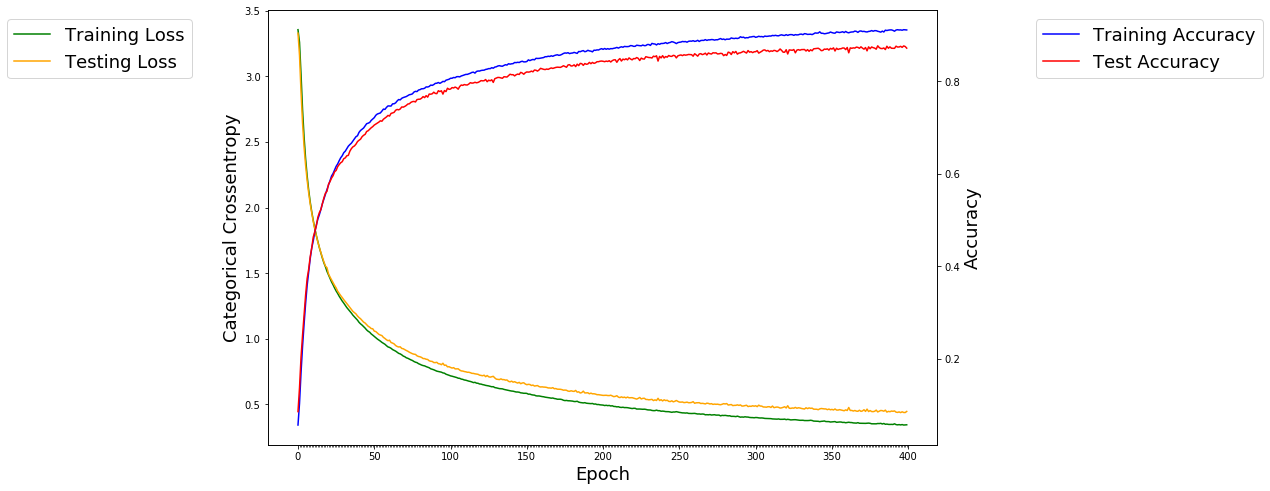

<Figure size 864x576 with 0 Axes>

In [22]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(12, 8))


# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_labels = history.epoch

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
ax.plot(train_loss, label='Training Loss', color='g')
ax.plot(test_loss, label='Testing Loss', color='orange')

# Set title
#plt.title('Training and Testing Loss by Epoch', fontsize=25)
ax.set_xlabel('Epoch', fontsize=18)
ax.set_ylabel('Categorical Crossentropy', fontsize=18)
ax.set_xticks(epoch_labels, epoch_labels)    # ticks, labels
ax.legend(fontsize=18, bbox_to_anchor=(-0.1, 1), loc='upper right', ncol=1)



ax2=ax.twinx();
ax2.plot(history.history['accuracy'], label= 'Training Accuracy', color='b')
ax2.plot(history.history['val_accuracy'], label= 'Test Accuracy', color='r')
ax2.set_ylabel('Accuracy', fontsize=18)
ax2.legend(fontsize=18, bbox_to_anchor=(1.5, 1), loc='upper right', ncol=1);



### classification_report

In [36]:
directory = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'J':9, 'K':10, 'L':11, 'M':12, \
            'N':13, 'O':14, 'P':15, 'Q':16, 'R':17, 'S':18, 'T':19, 'U':20, 'V':21, 'W':22, 'X':23, 'Y':24, \
            'Z':25, 'del':26, 'nothing':27, 'space':28}

y_pred = cnn.predict(X_test)
predicted_categories = np.argmax(y_pred, axis = 1)
true_categories = np.argmax(y_test, axis = 1)
print(classification_report(true_categories, predicted_categories, target_names=list(directory.keys())))

              precision    recall  f1-score   support

           A       0.88      0.89      0.88       660
           B       0.87      0.88      0.88       660
           C       0.94      0.98      0.96       660
           D       0.89      0.87      0.88       660
           E       0.83      0.81      0.82       660
           F       0.96      0.91      0.93       660
           G       0.93      0.87      0.90       660
           H       0.93      0.96      0.94       660
           I       0.86      0.90      0.88       660
           J       0.91      0.95      0.93       660
           K       0.88      0.89      0.88       660
           L       0.93      0.92      0.92       660
           M       0.77      0.84      0.80       660
           N       0.86      0.82      0.84       660
           O       0.81      0.81      0.81       660
           P       0.92      0.93      0.93       660
           Q       0.96      0.94      0.95       660
           R       0.74    

### convert Jill's video to frames

In [38]:
count = 0
videoFile = '../Jill_Video_2/IMG_4371.mov'
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="../Jill_Video_2/frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


### read Jill's frames and predict the word

In [84]:
# Read Jill's images

pixel_x = 60
pixel_y = 60
path_Jill = '../Jill_Video_2/'
df_Jill = pd.DataFrame()
#fig= plt.subplots(figsize=(40, 400))
count = 1

# for x in [10, 11, 12, 14, 16]:
for x in [10, 11, 12, 14, 16]:
    file_name = path_Jill + 'frame' + str(x) + '.jpg'
    image_Jill = tf.image.decode_image(tf.io.read_file(file_name))
    grayscale_Jill = tfio.experimental.color.rgb_to_grayscale(image_Jill)
    if x ==10:
        grayscale_Jill_boxed = grayscale_Jill[600:1400, 100:600]
    elif x==11:
        grayscale_Jill_boxed = grayscale_Jill[750:1250, 250:600]
    elif x==12:
        grayscale_Jill_boxed = grayscale_Jill[700:1250, 0:400]
    elif x==14:
        grayscale_Jill_boxed = grayscale_Jill[700:1250, 0:450]
    else:
        grayscale_Jill_boxed = grayscale_Jill[700:1200, 80:400]
 
    downsized = tf.image.resize(grayscale_Jill_boxed, (pixel_x, pixel_y), method=tf.image.ResizeMethod.BILINEAR, \
                                preserve_aspect_ratio=False, antialias=False, name=None)
    
#    ax = plt.subplot(8,1,count)
#    ax.imshow(np.array(downsized).reshape(downsized.shape[0], downsized.shape[1]));  
#    count+=1 
    
#    plt.figure(figsize=(10,10))
#    plt.imshow(np.array(downsized).reshape(downsized.shape[0], downsized.shape[1]));    

    img_df_Jill = pd.DataFrame(tfds.as_numpy(downsized).reshape(1, pixel_x*pixel_y))
    df_Jill = pd.concat([df_Jill, img_df_Jill], ignore_index = True, axis = 0)
    
    
    
word_num = {a:b for a,b in zip(directory.values(),directory.keys())}

df_Jill = df_Jill.astype('float32')/255
array_Jill = df_Jill.to_numpy().reshape(df_Jill.shape[0], pixel_x, pixel_y, 1)
Jill_pred = cnn.predict(array_Jill)
predicted_categories_Jill = np.argmax(Jill_pred, axis = 1)
pred_Jill = [word_num[item] for item in predicted_categories_Jill]

print('ActualWord = HELLO')
print('Prediction =',''.join(map(str, pred_Jill)))


(5, 3600)
ActualWord = HELLO
Prediction = HCLRQ
